In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('1.filtered_df.csv')
df.index = df['Unnamed: 0']
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,row,column,lat_min,lat_max,lon_min,lon_max,nature,entartainment,transports,art,sport,tourism,security,accessibility
Unnamed: 0,,,,,,,,,,,,,,
R1C2,1.0,2.0,45.000004,45.005004,11.500001,11.5075,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
R1C3,1.0,3.0,45.000004,45.005004,11.507500,11.5150,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
R1C5,1.0,5.0,45.000004,45.005004,11.522500,11.5300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
R1C6,1.0,6.0,45.000004,45.005004,11.530000,11.5375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
R1C7,1.0,7.0,45.000004,45.005004,11.537500,11.5450,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R200C196,200.0,196.0,45.994998,45.999998,12.955000,12.9625,3.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0
R200C197,200.0,197.0,45.994998,45.999998,12.962500,12.9700,4.0,0.0,11.0,1.0,3.0,0.0,0.0,0.0
R200C198,200.0,198.0,45.994998,45.999998,12.970000,12.9775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.describe()

,row,column,lat_min,lat_max,lon_min,lon_max,nature,entartainment,transports,art,sport,tourism,security,accessibility
count,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000,28154.000000
mean,116.276550,82.567912,45.576383,45.581383,12.104260,12.111760,8.075939,0.631420,13.037224,0.224160,0.368864,0.311110,0.064751,0.260070
std,56.077414,52.709694,0.280385,0.280385,0.395323,0.395323,22.607436,4.291356,28.387850,0.780593,1.556914,1.535014,0.429399,2.014438
min,1.000000,2.000000,45.000004,45.005004,11.500001,11.507500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,39.000000,45.365001,45.370001,11.777500,11.785000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,126.000000,76.000000,45.625000,45.630000,12.055000,12.062500,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,163.000000,119.000000,45.809999,45.814999,12.377500,12.385000,8.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,200.000000,200.000000,45.994998,45.999998,12.985000,12.992500,667.000000,302.000000,968.000000,23.000000,97.000000,74.000000,19.000000,162.000000


In [5]:
# initialize the visualization matrix
viz_matrix = np.zeros([int(df.row.max()), int(df.column.max())])

In [6]:
values = df.iloc[:, 6:].sum(axis = 1).to_list()
rows = df.row.to_list()
columns = df.column.to_list()

In [7]:
for value, row, column in zip(values, rows, columns):
    viz_matrix[int(row) - 1, int(column) - 1] = value

In [8]:
# normalization
viz_matrix_normalized = (viz_matrix - viz_matrix.mean()) /viz_matrix.std()

# remove outliers
normalization_intensity = 0.01
low, high = np.percentile(viz_matrix_normalized, normalization_intensity * 100), np.percentile(viz_matrix_normalized, (1 - normalization_intensity) * 100)

viz_matrix_normalized = np.where(viz_matrix_normalized < low, low, viz_matrix_normalized)
viz_matrix_normalized = np.where(viz_matrix_normalized > high, high, viz_matrix_normalized)

<AxesSubplot:>

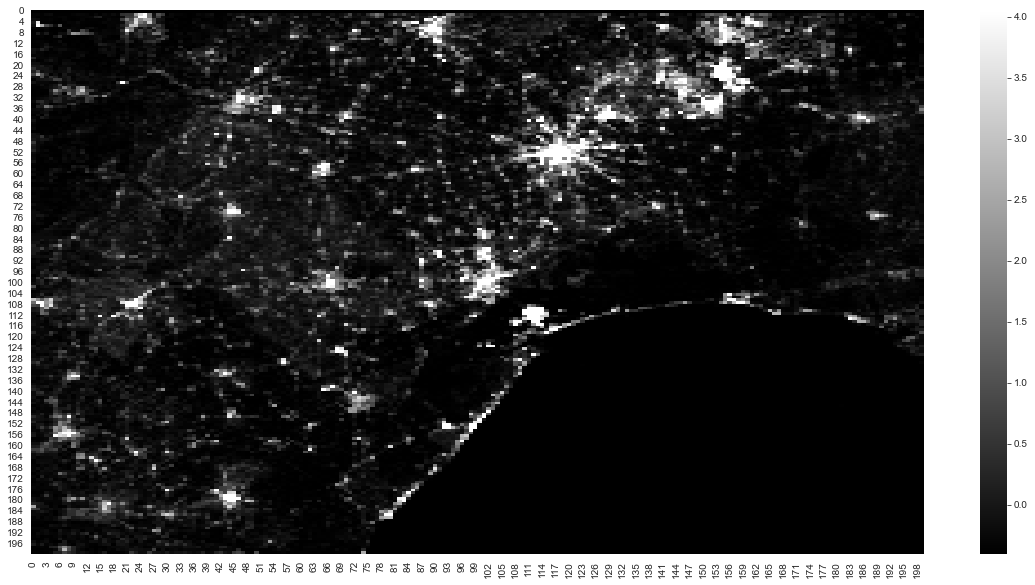

In [9]:
# plotting
fig, ax = plt.subplots(figsize=(20,10))

cmap = sns.cubehelix_palette(light = 0,
                             dark = 1,
                             hue = 0,
                             as_cmap=True)

sns.heatmap(np.rot90(viz_matrix_normalized, k = 3), cmap = cmap)